In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [61]:
churn_raw = pd.read_csv('churn.csv')
churn_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
churn_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [64]:
churn = churn_raw.drop(columns=['customerID'])
churn = churn.rename(columns={'gender': 'Gender', 'tenure': 'Tenure'})
churn[churn['TotalCharges'] == ' '].head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [65]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce').astype(float)
churn['TotalCharges'] = churn['TotalCharges'].fillna(0)

In [66]:
churn["SeniorCitizen"] = churn["SeniorCitizen"].map({0: "No", 1: "Yes", 'No': 'No', 'Yes': 'Yes'})
churn.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [67]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [68]:
for i, c in enumerate(churn.columns):
    print(i, ': ', c)
    print(churn[c].unique())
    print()

0 :  Gender
['Female' 'Male']

1 :  SeniorCitizen
['No' 'Yes']

2 :  Partner
['Yes' 'No']

3 :  Dependents
['No' 'Yes']

4 :  Tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

5 :  PhoneService
['No' 'Yes']

6 :  MultipleLines
['No phone service' 'No' 'Yes']

7 :  InternetService
['DSL' 'Fiber optic' 'No']

8 :  OnlineSecurity
['No' 'Yes' 'No internet service']

9 :  OnlineBackup
['Yes' 'No' 'No internet service']

10 :  DeviceProtection
['No' 'Yes' 'No internet service']

11 :  TechSupport
['No' 'Yes' 'No internet service']

12 :  StreamingTV
['No' 'Yes' 'No internet service']

13 :  StreamingMovies
['No' 'Yes' 'No internet service']

14 :  Contract
['Month-to-month' 'One year' 'Two year']

15 :  PaperlessBilling
['Yes' 'No']

16 :  PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic

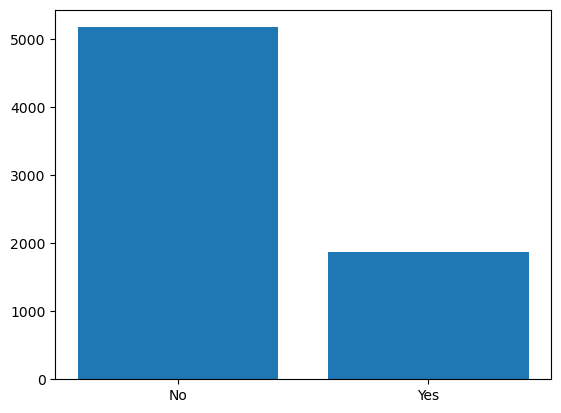

In [69]:
data = churn['Churn'].value_counts()
plt.bar(data.index, data.values)
plt.show()

In [32]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
def plot_bar_chart(feature):
    grouped = churn.groupby([feature, 'Churn']).size().unstack(fill_value=0)

    # Set up positions
    x = np.arange(len(grouped))  # positions for each Churn category
    n_subgroups = len(grouped.columns)
    width = 0.8 / n_subgroups      # total bar width spread out among subgroups

    fig, ax = plt.subplots()

    # Plot each subgroup
    for i, subgroup in enumerate(grouped.columns):
        offset = (i - n_subgroups / 2) * width + width / 2
        ax.bar(x + offset, grouped[subgroup], width, label=subgroup)

    # Customize
    ax.set_xticks(x)
    ax.set_xticklabels(grouped.index)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_title(f'Counts by Churn and {feature}')
    ax.legend(title='Churn')

    plt.tight_layout()
    plt.show()

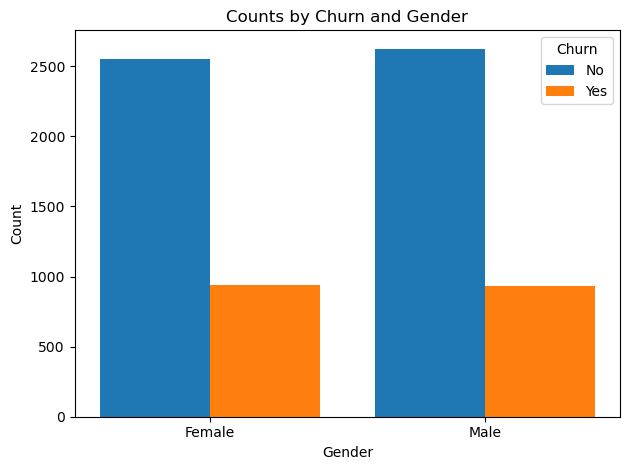

In [74]:
plot_bar_chart('Gender')

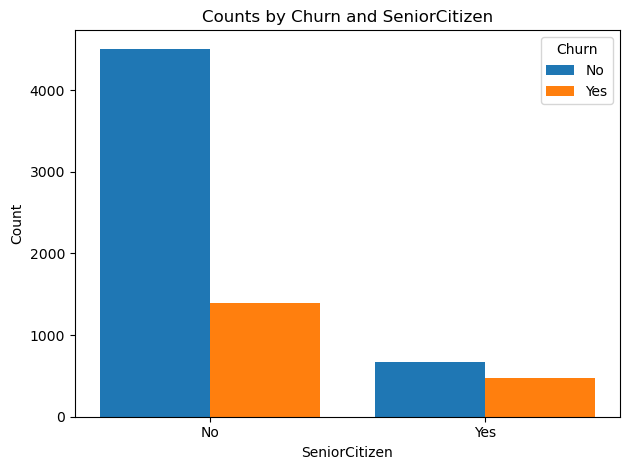

In [75]:
plot_bar_chart('SeniorCitizen')

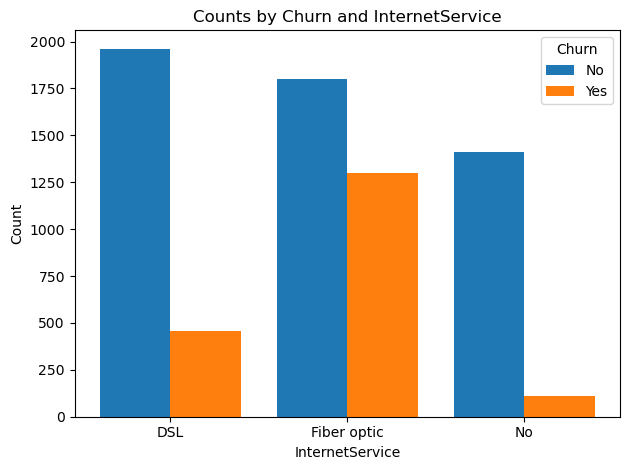

In [76]:
plot_bar_chart('InternetService')

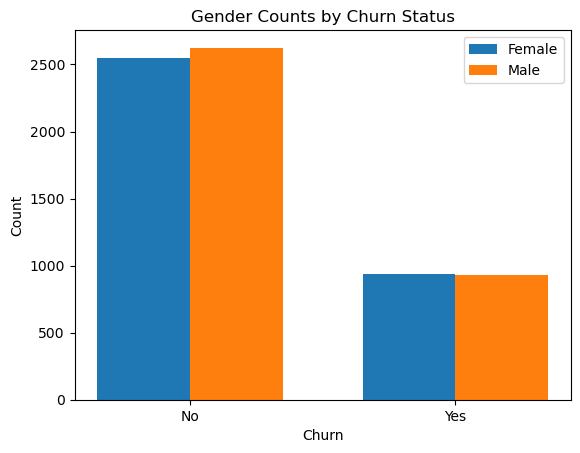

In [31]:
grouped = churn.groupby(['Churn', 'gender']).size().unstack(fill_value=0)
x = np.arange(len(grouped.index))  # positions for Churn categories
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, grouped['Female'], width, label='Female')
ax.bar(x + width/2, grouped['Male'], width, label='Male')

ax.set_xticks(x)
ax.set_xticklabels(grouped.index)
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_title('Gender Counts by Churn Status')
ax.legend()

plt.show()

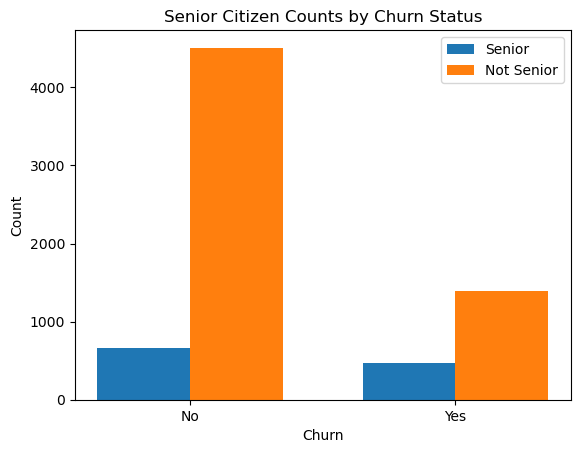

In [35]:
grouped = churn.groupby(['Churn', 'SeniorCitizen']).size().unstack(fill_value=0)
x = np.arange(len(grouped.index))  # positions for Churn categories
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, grouped['Yes'], width, label='Senior')
ax.bar(x + width/2, grouped['No'], width, label='Not Senior')

ax.set_xticks(x)
ax.set_xticklabels(grouped.index)
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_title('Senior Citizen Counts by Churn Status')
ax.legend()

plt.show()

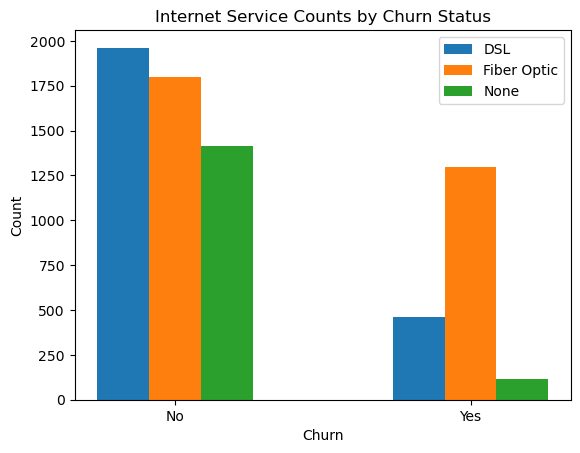

In [41]:
grouped = churn.groupby(['Churn', 'InternetService']).size().unstack(fill_value=0)
x = np.arange(len(grouped.index))  # positions for Churn categories
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, grouped['DSL'], width/2, label='DSL')
ax.bar(x, grouped['Fiber optic'], width/2, label='Fiber Optic')
ax.bar(x + width/2, grouped['No'], width/2, label='None')

ax.set_xticks(x)
ax.set_xticklabels(grouped.index)
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_title('Internet Service Counts by Churn Status')
ax.legend()

plt.show()

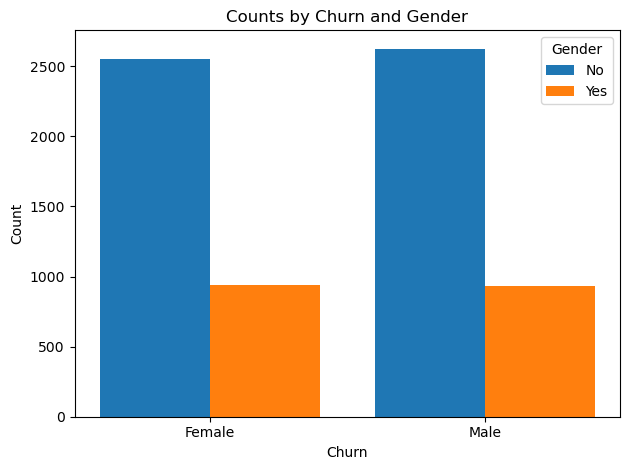

In [49]:
grouped = churn.groupby(['gender', 'Churn']).size().unstack(fill_value=0)

# Set up positions
x = np.arange(len(grouped))  # positions for each Churn category
n_subgroups = len(grouped.columns)
width = 0.8 / n_subgroups      # total bar width spread out among subgroups

fig, ax = plt.subplots()

# Plot each subgroup
for i, subgroup in enumerate(grouped.columns):
    offset = (i - n_subgroups / 2) * width + width / 2
    ax.bar(x + offset, grouped[subgroup], width, label=subgroup)

# Customize
ax.set_xticks(x)
ax.set_xticklabels(grouped.index)
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_title('Counts by Churn and Gender')
ax.legend(title='Gender')

plt.tight_layout()
plt.show()

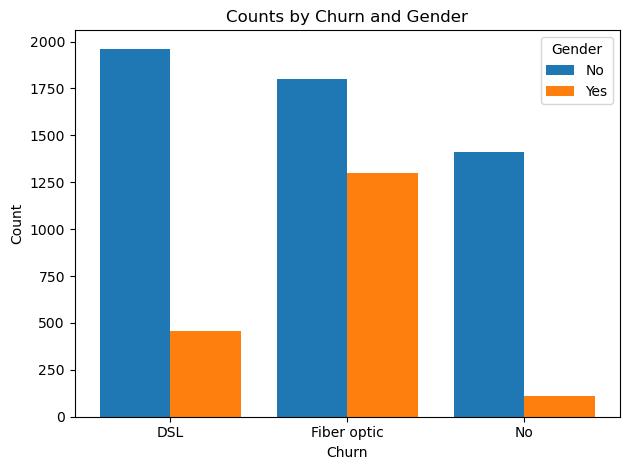

In [50]:
grouped = churn.groupby(['InternetService', 'Churn']).size().unstack(fill_value=0)

# Set up positions
x = np.arange(len(grouped))  # positions for each Churn category
n_subgroups = len(grouped.columns)
width = 0.8 / n_subgroups      # total bar width spread out among subgroups

fig, ax = plt.subplots()

# Plot each subgroup
for i, subgroup in enumerate(grouped.columns):
    offset = (i - n_subgroups / 2) * width + width / 2
    ax.bar(x + offset, grouped[subgroup], width, label=subgroup)

# Customize
ax.set_xticks(x)
ax.set_xticklabels(grouped.index)
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_title('Counts by Churn and Gender')
ax.legend(title='Gender')

plt.tight_layout()
plt.show()